<a href="https://colab.research.google.com/github/sundram9452/salary_prediction/blob/main/salary_prediction_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [56]:


df = pd.read_csv("Salary_Data.csv")
df=df.dropna()
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Years of Experience'].plot(kind='hist', bins=20, title='Years of Experience')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Salary'].plot(kind='hist', bins=20, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Education Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Years of Experience', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Years of Experience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Years of Experience'].plot(kind='line', figsize=(8, 4), title='Years of Experience')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Salary'].plot(kind='line', figsize=(8, 4), title='Salary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Education Level'].value_counts()
    for x_label, grp in df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Education Level')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Education Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Education Level', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Years of Experience', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Education Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Years of Experience', y='Education Level', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [48]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
label_cols = ['Gender', 'Education Level', 'Job Title']
le_dict = {}  # Store label encoders for reference

# Encode each categorical column
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Save encoder to inverse transform later if needed

print(df)

       Age  Gender  Education Level  Job Title  Years of Experience    Salary
0     32.0       1                0        175                  5.0   90000.0
1     28.0       0                3         18                  3.0   65000.0
2     45.0       1                5        144                 15.0  150000.0
3     36.0       0                0        115                  7.0   60000.0
4     52.0       1                3         25                 20.0  200000.0
...    ...     ...              ...        ...                  ...       ...
6699  49.0       0                5         33                 20.0  200000.0
6700  32.0       1                2        115                  3.0   50000.0
6701  30.0       0                1         41                  4.0   55000.0
6702  46.0       1                4         96                 14.0  140000.0
6703  26.0       0                2        117                  1.0   35000.0

[6698 rows x 6 columns]


In [49]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

In [51]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

RMSE: 8357.21
R2 Score: 0.98


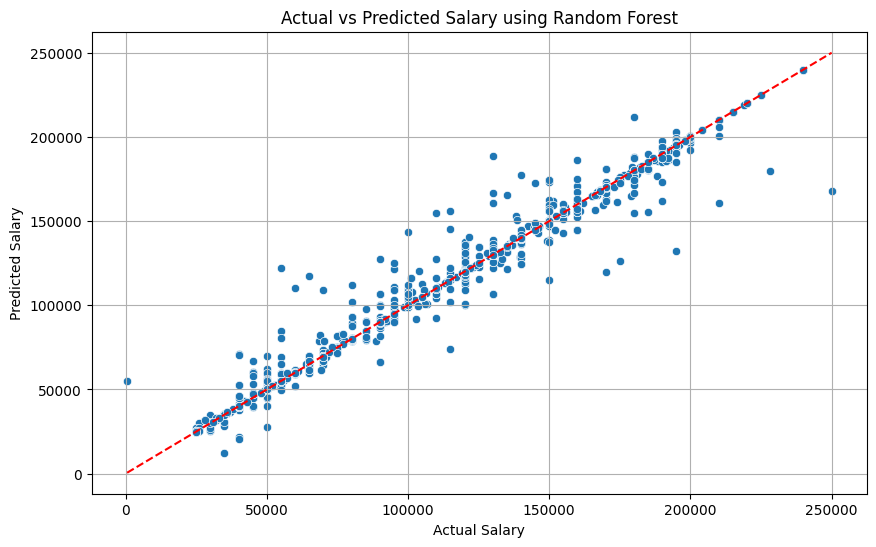

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary using Random Forest")
plt.grid(True)
plt.show()

In [53]:
X_test_scaled

array([[ 0.31229255,  0.89507087,  0.79000963, -1.57390402,  0.14957326],
       [-0.8728315 , -1.09736357,  0.79000963, -0.88898378, -0.68125146],
       [-1.1361924 , -1.09736357,  0.24000033, -1.31705893, -1.17974629],
       ...,
       [-0.74115105, -1.09736357,  1.34001893, -1.06021384, -0.34892157],
       [ 0.7073339 , -1.09736357, -1.41002758, -1.59102703,  0.3157382 ],
       [-1.00451195,  0.89507087, -0.86001828,  1.35413002, -0.84741641]])

In [54]:
y_test

,Salary
1883,150000.0
2630,75969.0
498,100000.0
5973,60000.0
4108,80000.0
...,...
2830,73218.0
6154,65000.0
4940,105000.0
135,55000.0
